In [1]:
!python f_model.py

0 0.5643203883495146
1 0.6152912621359223
2 0.6516990291262136
3 0.6480582524271845
4 0.6468446601941747
5 0.6674757281553398
6 0.6796116504854369
7 0.6699029126213593
8 0.6893203883495146
9 0.7038834951456311
10 0.6978155339805825
11 0.6881067961165048
12 0.7160194174757282
13 0.7038834951456311
14 0.7038834951456311
15 0.7050970873786407
16 0.6905339805825242
17 0.7063106796116505
18 0.6990291262135923
19 0.6953883495145631
20 0.7172330097087378
21 0.7014563106796117
22 0.7075242718446602
23 0.6941747572815534
24 0.7099514563106796
25 0.7014563106796117
26 0.7111650485436893
27 0.7111650485436893
28 0.7196601941747572
29 0.6978155339805825
0 0.5992736077481841
1 0.6464891041162227
2 0.6307506053268765
3 0.6707021791767555
4 0.6452784503631961
5 0.6840193704600485
6 0.6416464891041163
7 0.662227602905569
8 0.6719128329297821
9 0.6549636803874092
10 0.6803874092009685
11 0.6646489104116223
12 0.6803874092009685
13 0.6767554479418886
14 0.6719128329297821
15 0.6670702179176755
16 0.6743

In [ ]:
!python w_model.py

[]
[]
[]
['28С            ', 'Ст1пс          ', 'Ст3Гпс         ']
0 0.5544794188861986
1 0.6210653753026635
2 0.6089588377723971
3 0.6343825665859564
4 0.6779661016949152
5 0.6610169491525424
6 0.6452784503631961
7 0.6888619854721549
8 0.6949152542372882
9 0.6646489104116223
0 0.635593220338983
1 0.6368038740920097
2 0.6452784503631961
3 0.662227602905569
4 0.6779661016949152
5 0.5956416464891041
6 0.6719128329297821
7 0.6803874092009685
8 0.5786924939467313
9 0.639225181598063
0 0.5968523002421308
1 0.6416464891041163
2 0.62590799031477
3 0.6537530266343826
4 0.6464891041162227
5 0.6864406779661016
6 0.6791767554479419
7 0.6380145278450363
8 0.6682808716707022
9 0.6731234866828087
0 0.6560975609756098
1 0.6365853658536585
2 0.6536585365853659
3 0.6378048780487805
4 0.6865853658536586


In [2]:
!python f_model_inference.py

In [3]:
!python v_model_inference.py

[]
[]
[]
['Ст3Гпс         ', 'Ст1пс          ', '28С            ']


In [4]:
!python fv_blend.py

In [1]:
!nvidia-smi

Sat Oct 30 09:43:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:8B:00.0 Off |                    0 |
| N/A   34C    P0    36W / 300W |   1471MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
DATA_DIR = '../data/'

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
!ls ../data

chronom_test.csv   gas_test.csv     plavki_train.csv	   sip_train.csv
chronom_train.csv  gas_train.csv    produv_test.csv	   target_train.csv
chugun_test.csv    lom_test.csv     produv_train.csv
chugun_train.csv   lom_train.csv    sample_submission.csv
datka.zip	   plavki_test.csv  sip_test.csv


In [5]:
pd.read_csv('../data/chronom_train.csv')['NOP'].unique()

array(['межпл. простой', 'Осмотр конвертера', 'Наведение гарнисажа',
       'Слив шлака', 'Отсутствие O2', 'Завалка лома', 'Нагрев лома',
       'Заливка чугуна', 'Продувка', 'Повалка', 'Ожидание стальковша',
       'Выпуск металла', 'Прерыв. выпуска', 'Вхождение в гр.МНЛЗ',
       'Обрыв горловины', 'Додувка на t', 'Наложение продувки',
       'Охл. азотом', 'Подварка  футеровки', 'Отсутствие чугуна',
       'Отсечка шлака', 'Додувка на C', 'Неиспр. механ. обор.',
       'Неиспр. электр. обор', 'Ремонт летки', 'Замена фурмы', 'ППР',
       'Отсутствие мет.шихты', 'Полусухое торкрет.', 'Ожидание шл.чаш',
       'Отсут. своб.разл.пл.', 'Замер положения фурм',
       'Неиспр. энерг. обор', 'Неиспр. АСУ и КИПиА', 'Скач. шлака'],
      dtype=object)

In [6]:
df_train_static = pd.read_csv(DATA_DIR + 'plavki_train.csv').drop_duplicates('NPLV').reset_index(drop=True)
df_test_static = pd.read_csv(DATA_DIR + 'plavki_test.csv')

target = pd.read_csv(DATA_DIR + 'target_train.csv')
df_train_static = df_train_static.merge(target, on='NPLV', how='left')

for plavki in [df_train_static, df_test_static]:
    plavki['plavka_VR_NACH'] = pd.to_datetime(plavki['plavka_VR_NACH'])
    plavki['plavka_VR_KON'] = pd.to_datetime(plavki['plavka_VR_KON'])
    plavki['plav_seconds'] = (((plavki.plavka_VR_KON.values - plavki.plavka_VR_NACH.values))*1e-9).astype(int)
    
chugun_train = pd.read_csv(DATA_DIR + 'chugun_train.csv')
chugun_train.columns = ['NPLV'] + [x+'_ch' for x in chugun_train.columns.tolist()[1:-1]] + ['DATA_ZAMERA']
chugun_test = pd.read_csv(DATA_DIR + 'chugun_test.csv')
chugun_test.columns = ['NPLV'] + [x+'_ch' for x in chugun_test.columns.tolist()[1:-1]] + ['DATA_ZAMERA']

df_train_static = df_train_static.merge(chugun_train, on='NPLV', how='left').drop(columns = ['DATA_ZAMERA'])
df_test_static = df_test_static.merge(chugun_test, on='NPLV', how='left').drop(columns = ['DATA_ZAMERA'])

df_train_static.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,...,T_ch,SI_ch,MN_ch,S_ch,P_ch,CR_ch,NI_ch,CU_ch,V_ch,TI_ch
0,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,...,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084
1,510009,2021-01-01 04:00:44,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12,...,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096
2,510010,2021-01-01 05:12:29,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13,...,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110
3,510011,2021-01-01 06:13:48,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14,...,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110
4,510012,2021-01-01 07:13:44,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15,...,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070


In [7]:
lom_train = pd.read_csv(DATA_DIR + 'lom_train.csv')
lom_test = pd.read_csv(DATA_DIR + 'lom_test.csv')

for f in ['VDL','NML']:
    le = LabelEncoder()
    le.fit(lom_train[f])
    lom_train[f] = le.transform(lom_train[f])
    lom_test[f] = le.transform(lom_test[f])
    
lom_cat_feats_dict = {
    'VDL': (lom_train['VDL'].max() + 1, 3),
    'NML': (lom_train['NML'].max() + 1, 3)
}
lom_cat_feats = ['VDL', 'NML']
lom_num_feats = ['VES']

ss = StandardScaler()
lom_train[lom_num_feats] = np.log1p(lom_train[lom_num_feats])
lom_test[lom_num_feats] = np.log1p(lom_test[lom_num_feats])

ss.fit(lom_train[lom_num_feats])
lom_train[lom_num_feats] = ss.transform(lom_train[lom_num_feats])
lom_test[lom_num_feats] = ss.transform(lom_test[lom_num_feats])
    
lom_train

,NPLV,VDL,NML,VES
0,510008,1,1,1.321052
1,510008,2,6,0.225797
2,510008,3,2,-1.316742
3,510009,1,1,1.207622
4,510009,2,6,0.505576
...,...,...,...,...
6371,512321,2,6,-1.014459
6372,512321,3,2,-1.316742
6373,512322,1,1,1.470192
6374,512322,3,2,-0.694001


In [8]:
lom_cat_feats_dict

{'VDL': (10, 3), 'NML': (10, 3)}

In [9]:
df_train_static.columns

Index(['NPLV', 'plavka_VR_NACH', 'plavka_VR_KON', 'plavka_NMZ',
       'plavka_NAPR_ZAD', 'plavka_STFUT', 'plavka_TIPE_FUR', 'plavka_ST_FURM',
       'plavka_TIPE_GOL', 'plavka_ST_GOL', 'TST', 'C', 'plav_seconds',
       'VES_ch', 'T_ch', 'SI_ch', 'MN_ch', 'S_ch', 'P_ch', 'CR_ch', 'NI_ch',
       'CU_ch', 'V_ch', 'TI_ch'],
      dtype='object')

array([[<AxesSubplot:title={'center':'VES'}>]], dtype=object)

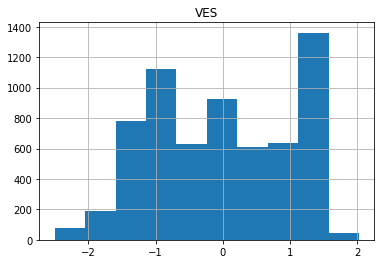

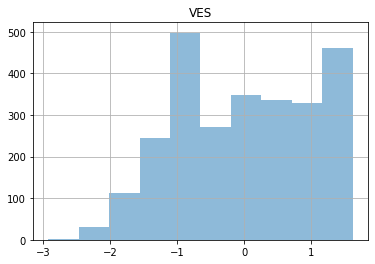

In [10]:
lom_train[lom_num_feats].hist()
lom_test[lom_num_feats].hist(alpha=0.5)

In [11]:
sip_train = pd.read_csv(DATA_DIR + 'sip_train.csv')
sip_test = pd.read_csv(DATA_DIR + 'sip_test.csv')

for df in [sip_train, sip_test]:
    df['DAT_OTD'] = pd.to_datetime(df['DAT_OTD'])

time_cols = ['NPLV', 'plavka_VR_NACH', 'plav_seconds']
sip_train = sip_train.merge(df_train_static[time_cols], on='NPLV', how='left')
sip_train['time_from_start'] = (sip_train['DAT_OTD'] - sip_train['plavka_VR_NACH']).dt.seconds
sip_train = sip_train.loc[sip_train.time_from_start <= sip_train.plav_seconds].drop(columns=time_cols[1:]+['DAT_OTD']).reset_index(drop=True)
sip_test = sip_test.merge(df_test_static[time_cols], on='NPLV', how='left')
sip_test['time_from_start'] = (sip_test['DAT_OTD'] - sip_test['plavka_VR_NACH']).dt.seconds
sip_test = sip_test.loc[sip_test.time_from_start <= sip_test.plav_seconds].drop(columns=time_cols[1:]+['DAT_OTD']).reset_index(drop=True)

    
for f in ['VDSYP', 'NMSYP']:
    le = LabelEncoder()
    sip_train[f] = sip_train[f].astype(str)
    sip_test[f] = sip_test[f].astype(str)
    common = set(sip_train[f].unique().tolist()) & set(sip_test[f].unique().tolist())
    sip_train.loc[~sip_train[f].isin(common), f] = 'None'
    sip_test.loc[~sip_test[f].isin(common), f] = 'None'
    le.fit(['None'] + sip_train[f].unique().tolist())
    sip_train[f] = le.transform(sip_train[f])
    sip_test[f] = le.transform(sip_test[f])
    
sip_cat_feats_dict = {
    'VDSYP': (max(sip_train['VDSYP'].max() + 1,sip_test['VDSYP'].max() + 1), 3),
    'NMSYP': (max(sip_train['NMSYP'].max() + 1,sip_test['NMSYP'].max() + 1), 3)
}

sip_cat_feats = ['VDSYP', 'NMSYP']
sip_num_feats = ['VSSYP']
ss = StandardScaler()
ss.fit(sip_train[sip_num_feats])
sip_train[sip_num_feats] = ss.transform(sip_train[sip_num_feats])
sip_test[sip_num_feats] = ss.transform(sip_test[sip_num_feats])

(sip_cat_feats_dict, sip_test['VDSYP'].max() + 1)

({'VDSYP': (8, 3), 'NMSYP': (5, 3)}, 8)

array([[<AxesSubplot:title={'center':'VSSYP'}>]], dtype=object)

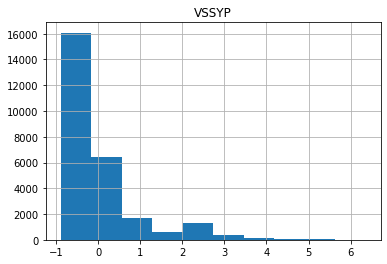

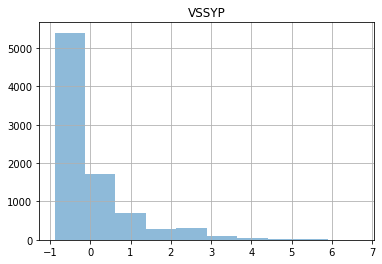

In [12]:
sip_train[sip_num_feats].hist()
sip_test[sip_num_feats].hist(alpha=0.5)

In [13]:
def make_index_df(df):
    index_dfs = []
    for g,q in df.groupby('NPLV'):
        ts = q.plav_seconds.values[0] + 1
        index_df = pd.DataFrame({
            'NPLV': [g]*ts,
            'time_from_start': list(range(ts))
        })
        index_dfs.append(index_df)
    return pd.concat(index_dfs, ignore_index=True).reset_index(drop=True)
train_index_df = make_index_df(df_train_static)
test_index_df = make_index_df(df_test_static)

In [14]:
gas_train = pd.read_csv(DATA_DIR + 'gas_train.csv')
gas_test = pd.read_csv(DATA_DIR + 'gas_test.csv')

for df in [gas_train, gas_test]:
    df['Time'] = pd.to_datetime(df['Time'])

time_cols = ['NPLV', 'plavka_VR_NACH', 'plav_seconds']
gas_train = gas_train.merge(df_train_static[time_cols], on='NPLV', how='left')
gas_train['time_from_start'] = (gas_train['Time'] - gas_train['plavka_VR_NACH']).dt.seconds
gas_train = gas_train.loc[gas_train.time_from_start <= gas_train.plav_seconds].drop(columns=time_cols[1:]+['Time']).reset_index(drop=True)
gas_test = gas_test.merge(df_test_static[time_cols], on='NPLV', how='left')
gas_test['time_from_start'] = (gas_test['Time'] - gas_test['plavka_VR_NACH']).dt.seconds
gas_test = gas_test.loc[gas_test.time_from_start <= gas_test.plav_seconds].drop(columns=time_cols[1:]+['Time']).reset_index(drop=True)

gas_train

,NPLV,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure,time_from_start
0,510008,218263.343750,262.847229,18.722993,80.132247,0.087755,0.163878,9.229025e-03,0.893243,0.000000,0.000000,13.085938,0
1,510008,218263.343750,262.847229,18.732721,80.138406,0.087959,0.148980,8.390023e-03,0.892948,0.000000,0.000000,13.085938,1
2,510008,218369.359375,262.152771,18.742449,80.144565,0.088163,0.134082,7.551021e-03,0.892653,0.000000,0.000000,13.085938,2
3,510008,218475.359375,261.805573,18.752177,80.150724,0.088367,0.119184,6.712018e-03,0.892358,0.000000,0.000000,13.093172,3
4,510008,218369.359375,260.763885,18.761905,80.156883,0.088571,0.104286,5.873016e-03,0.892063,0.000000,0.000000,13.093172,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467238,512322,207386.734375,118.402779,1.890000,97.220001,0.090000,0.050000,0.000000e+00,0.750000,23.900463,27.054343,14.424190,4835
6467239,512322,207051.609375,118.402779,2.710000,96.410004,0.080000,0.040000,0.000000e+00,0.770000,23.900463,27.054342,14.424190,4836
6467240,512322,207163.375000,118.402779,3.770000,95.349998,0.090000,0.030000,0.000000e+00,0.770000,23.900463,27.054341,14.438658,4837
6467241,512322,206827.906250,118.750000,3.400000,95.720001,0.090000,0.040000,0.000000e+00,0.750000,23.900463,27.054340,14.445890,4838


In [15]:
gas_train = train_index_df.merge(gas_train, on=['NPLV','time_from_start'], how='left')
gas_test = test_index_df.merge(gas_test, on=['NPLV','time_from_start'], how='left')

In [16]:
produv_train = pd.read_csv(DATA_DIR + 'produv_train.csv')
produv_test = pd.read_csv(DATA_DIR + 'produv_test.csv')

for df in [produv_train, produv_test]:
    df['SEC'] = pd.to_datetime(df['SEC'])

time_cols = ['NPLV', 'plavka_VR_NACH', 'plav_seconds']
produv_train = produv_train.merge(df_train_static[time_cols], on='NPLV', how='left')
produv_train['time_from_start'] = (produv_train['SEC'] - produv_train['plavka_VR_NACH']).dt.seconds
produv_train = produv_train.loc[produv_train.time_from_start <= produv_train.plav_seconds].drop(columns=time_cols[1:]+['SEC']).reset_index(drop=True)
produv_test = produv_test.merge(df_test_static[time_cols], on='NPLV', how='left')
produv_test['time_from_start'] = (produv_test['SEC'] - produv_test['plavka_VR_NACH']).dt.seconds
produv_test = produv_test.loc[produv_test.time_from_start <= produv_test.plav_seconds].drop(columns=time_cols[1:]+['SEC']).reset_index(drop=True)

produv_train

,NPLV,RAS,POL,time_from_start
0,510008,382.000000,3.920000,615
1,510008,382.000000,3.920000,617
2,510008,553.000000,3.920000,619
3,510008,701.000000,3.920000,621
4,510008,813.000000,3.920000,623
...,...,...,...,...
2262268,512322,334.684791,5.201985,4832
2262269,512322,334.685542,5.201976,4834
2262270,512322,334.686292,5.201967,4836
2262271,512322,334.687042,5.201958,4838


In [17]:
train_df = gas_train.merge(produv_train, on=['NPLV', 'time_from_start'], how='left')
test_df = gas_test.merge(produv_test, on=['NPLV', 'time_from_start'], how='left')

ts_num_fts = ['V', 'T', 'O2', 'N2', 'H2', 'CO2', 'CO', 'AR', 
              'T фурмы 1', 'T фурмы 2', 'O2_pressure', 'RAS', 'POL']
train_df[ts_num_fts] = train_df[ts_num_fts].ffill().bfill().interpolate().fillna(0)
test_df[ts_num_fts] = test_df[ts_num_fts].ffill().bfill().interpolate().fillna(0)

ss = StandardScaler()
ss.fit(train_df[ts_num_fts])
train_df[ts_num_fts] = ss.transform(train_df[ts_num_fts])
test_df[ts_num_fts] = ss.transform(test_df[ts_num_fts])

In [18]:
train_df

,NPLV,time_from_start,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure,RAS,POL
0,510008,0,0.725656,-0.527292,0.944184,0.840072,-0.436442,-1.319476,-0.717220,0.383114,-1.997833,-1.913547,-3.841734,-0.073556,-0.233771
1,510008,1,0.725656,-0.527292,0.945193,0.840350,-0.436188,-1.321194,-0.717257,0.381772,-1.997833,-1.913547,-3.841734,-0.073556,-0.233771
2,510008,2,0.735438,-0.529815,0.946201,0.840628,-0.435934,-1.322913,-0.717295,0.380429,-1.997833,-1.913547,-3.841734,-0.073556,-0.233771
3,510008,3,0.745218,-0.531077,0.947210,0.840906,-0.435679,-1.324631,-0.717333,0.379087,-1.997833,-1.913547,-3.829978,-0.073556,-0.233771
4,510008,4,0.735438,-0.534861,0.948218,0.841183,-0.435425,-1.326350,-0.717370,0.377745,-1.997833,-1.913547,-3.829978,-0.073556,-0.233771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555260,512322,4840,-0.401894,-1.050814,-0.753230,1.590113,-0.433644,-1.334918,-0.717633,-0.178075,0.564112,0.508550,-1.631882,-0.588869,0.791899
6555261,512322,4840,-0.401894,-1.050814,-0.753230,1.590113,-0.433644,-1.334918,-0.717633,-0.178075,0.564112,0.508550,-1.631882,-0.494484,0.651282
6555262,512322,4840,-0.401894,-1.050814,-0.753230,1.590113,-0.433644,-1.334918,-0.717633,-0.178075,0.564112,0.508550,-1.631882,-0.400099,0.510664
6555263,512322,4840,-0.401894,-1.050814,-0.753230,1.590113,-0.433644,-1.334918,-0.717633,-0.178075,0.564112,0.508550,-1.631882,-0.305714,0.370046


In [19]:
static_cat_feats = ['plavka_NAPR_ZAD', 'plavka_TIPE_FUR', 
                    'plavka_TIPE_GOL', 'plavka_NMZ']

static_num_feats = ['plavka_STFUT','plavka_ST_FURM','plav_seconds','plavka_ST_GOL',
                    'VES_ch', 'T_ch', 'SI_ch', 'MN_ch', 'S_ch', 'P_ch', 'CR_ch',
                    'NI_ch', 'CU_ch', 'V_ch', 'TI_ch']

staic_cat_feats_dict = {}
for f in static_cat_feats:
    le = LabelEncoder()
    common = set(df_train_static[f].unique().tolist()) & set(df_test_static[f].unique().tolist())
    drop_c = []
    for c in common:
        tt = df_train_static.loc[df_train_static[f] == c, f].shape[0] + df_test_static.loc[df_test_static[f] == c, f].shape[0]
        if tt < 5:
            drop_c.append(c)
    print(drop_c)
    common = common - set(drop_c)
    df_train_static.loc[~df_train_static[f].isin(common), f] = 'None'
    df_test_static.loc[~df_test_static[f].isin(common), f] = 'None'
    le.fit(df_train_static[f])
    df_train_static[f] = le.transform(df_train_static[f])
    df_test_static[f] = le.transform(df_test_static[f])
    staic_cat_feats_dict[f] = (df_train_static[f].max() + 1, 3)
    
ss = StandardScaler()
ss.fit(df_train_static[static_num_feats])
df_train_static[static_num_feats] = ss.transform(df_train_static[static_num_feats])
df_test_static[static_num_feats] = ss.transform(df_test_static[static_num_feats])

staic_cat_feats_dict

[]
[]
[]
['28С            ', 'Ст3Гпс         ', 'Ст1пс          ']


{'plavka_NAPR_ZAD': (3, 3),
 'plavka_TIPE_FUR': (2, 3),
 'plavka_TIPE_GOL': (4, 3),
 'plavka_NMZ': (26, 3)}

In [20]:
target_fts = ['TST','C']

target_scaler = StandardScaler()
df_train_static[target_fts] = target_scaler.fit_transform(df_train_static[target_fts])

<AxesSubplot:>

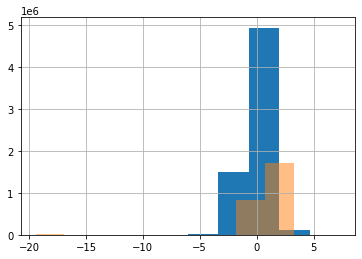

In [21]:
train_df['V'].hist()
test_df['V'].hist(alpha=0.5)

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

class EvrazDatasetV(Dataset):
    def __init__(self, static_train_df, lom_df, sip_df, ts_df):
        self.static_train_df = static_train_df.copy()
        self.lom_df = lom_df.copy()
        self.sip_df = sip_df.copy()
        self.ts_df = ts_df.copy()
        
        self.nlmv =  self.static_train_df.NPLV.unique()

    def __len__(self):
        return len(self.nlmv)

    def __getitem__(self, idx):    
        nlmv = self.nlmv[idx]
        
        return {"static_cat": self.static_train_df.loc[self.static_train_df.NPLV == nlmv, static_cat_feats].values[0],
                "static_numeric": self.static_train_df.loc[self.static_train_df.NPLV == nlmv, static_num_feats].values[0],
                "lom_cat": self.lom_df.loc[self.lom_df.NPLV == nlmv, lom_cat_feats].values,
                "lom_numeric": self.lom_df.loc[self.lom_df.NPLV == nlmv, lom_num_feats].values,
                "sip_cat": self.sip_df.loc[self.sip_df.NPLV == nlmv, sip_cat_feats].values,
                "sip_numeric": self.sip_df.loc[self.sip_df.NPLV == nlmv, sip_num_feats].values,
                "ts_numeric": self.ts_df.loc[self.ts_df.NPLV == nlmv, ts_num_fts].values,
                "y": self.static_train_df.loc[self.static_train_df.NPLV == nlmv, target_fts].values[0]
               }

In [23]:
lom_cat_feats_dict

{'VDL': (10, 3), 'NML': (10, 3)}

In [27]:
class AttentionWeightedAverage(nn.Module):
    def __init__(self, hidden_dim: int, return_attention: bool = False):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.return_attention = return_attention
        
        self.attention_vector = nn.Parameter(
            torch.empty(self.hidden_dim, dtype=torch.float32),
            requires_grad=True,
        )
        nn.init.xavier_normal_(self.attention_vector.unsqueeze(-1))

    def forward(
        self, x: torch.Tensor, mask: torch.Tensor
    ):
        logits = x.matmul(self.attention_vector)
        ai = (logits - logits.max()).exp()

        ai = ai * mask
        att_weights = ai / (ai.sum(dim=1, keepdim=True) + 1e-12)
        weighted_input = x * att_weights.unsqueeze(-1)
        output = weighted_input.sum(dim=1)

        if self.return_attention:
            return output, att_weights
        else:
            return output, None
        

CONV_FEAT_SIZE = 16
CONV_DELS = [1,2,4,8,16,32]

class EvrazModel(nn.Module):
    def __init__(self, config):
        super().__init__()
        
        self.static_cat_embs = nn.ModuleList([
            nn.Embedding(b[0], b[1])
        for a,b in staic_cat_feats_dict.items()] )
        
        self.lom_cat_embs = nn.ModuleList([
            nn.Embedding(b[0], b[1])
        for a,b in lom_cat_feats_dict.items()] )
        
        self.sip_cat_embs = nn.ModuleList([
            nn.Embedding(b[0], b[1])
        for a,b in sip_cat_feats_dict.items()] )
        
        self.lom_input_size = sum([b[1] for _,b in lom_cat_feats_dict.items()]) + len(lom_num_feats)
        self.lom_nn = nn.GRU(self.lom_input_size, config['lom_hidden_dim'], batch_first=True)
        self.sip_input_size = sum([b[1] for _,b in sip_cat_feats_dict.items()]) + len(sip_num_feats)
        self.sip_nn = nn.GRU(self.sip_input_size, config['sip_hidden_dim'], batch_first=True)
        self.static_input_size = sum([b[1] for _,b in staic_cat_feats_dict.items()]) + len(static_num_feats)
        
        self.main_nn_input_size = len(ts_num_fts) + self.static_input_size + config['lom_hidden_dim'] + config['sip_hidden_dim']
        self.main_nn = nn.GRU(self.main_nn_input_size, config['main_hidden_dim'], batch_first=True)
        self.conv_attn = AttentionWeightedAverage(config['main_hidden_dim'])
        self.head_input_size = config['main_hidden_dim']
          
        
        self.head = nn.Sequential(
            nn.LayerNorm(self.head_input_size),
            nn.Linear(self.head_input_size, config['head_hidden_dim']),
            nn.LayerNorm(config['head_hidden_dim']),
            nn.SiLU(),
            nn.Linear(config['head_hidden_dim'],2)
        )
        
        #self.head = nn.Linear(self.head_input_size, 2)
        
    def get_conv_size(self, i):
        if i == 0:
            return len(ts_num_fts)
        return CONV_FEAT_SIZE
    
    def forward(self, static_cat, static_numeric, 
                lom_cat, lom_numeric,
                sip_cat, sip_numeric,
                ts_numeric):
        ss = []
        for i,m in enumerate(self.static_cat_embs):
            ss.append(m(static_cat[:,i]))
        static = torch.cat(ss + [static_numeric], dim=-1)
        
        lom = []
        for i,m in enumerate(self.lom_cat_embs):
            lom.append(m(lom_cat[:,:,i]))
        lom = torch.cat(lom + [lom_numeric], dim=-1)
        _, lom = self.lom_nn(lom)
        
        sip = []
        for i,m in enumerate(self.sip_cat_embs):
            sip.append(m(sip_cat[:,:,i]))
        sip = torch.cat(sip + [sip_numeric], dim=-1)
        _, sip = self.sip_nn(sip)
        
        static_x = torch.cat([static, lom[:,-1], sip[:,-1]], dim=-1)
        static_x = static_x.unsqueeze(dim=-1).transpose(1,2).repeat(1,ts_numeric.shape[1],1)
        y = torch.cat([static_x, ts_numeric], dim=-1)
        y, _ = self.main_nn(y)
        y = self.conv_attn(y, torch.ones((y.shape[0], y.shape[1])).to(y.device))[0]
                
        return self.head(y)

In [28]:
config = {
    'lom_hidden_dim': 4,
    'sip_hidden_dim': 4,
    'main_hidden_dim': 32,
    'head_hidden_dim': 8,
}

model = EvrazModel(config).to(device)
ds = EvrazDatasetV(df_train_static, lom_train, sip_train, train_df)
dl = DataLoader(ds, shuffle=False, batch_size=1, num_workers=0)
for x in dl:
    out = model(x["static_cat"].long().to(device),
                x['static_numeric'].float().to(device),
                x['lom_cat'].long().to(device),
                x['lom_numeric'].float().to(device),
                x['sip_cat'].long().to(device),
                x['sip_numeric'].float().to(device),
                x['ts_numeric'].float().to(device)
         )
    break

In [29]:
out

tensor([[ 0.3225, -0.0363]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [30]:
def metric(answers, user_csv):
    delta_c = np.abs(np.array(answers[:,1]) - np.array(user_csv[:,1]))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers[:,0]) - np.array(user_csv[:,0]))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers[:,0])

    return np.sum(hit_rate_c + hit_rate_t) / 2 / N

In [59]:
import os, random
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=239)

def fix_all_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
fix_all_seeds(239) 

nplvs = df_train_static.NPLV.unique()

i = 0
for vipl_train, vipl_valid in kf.split(nplvs):
    if i == 1:
        break
    i+= 1

nplv_train = [nplvs[x] for x in vipl_train if nplvs[x] not in [511156,512299]]
nplv_valid = [nplvs[x] for x in vipl_valid if nplvs[x] not in [511156,512299]]

In [60]:
train_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_train)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_train)].reset_index(drop=True)
                        )
train_dl = DataLoader(train_ds, shuffle=True, batch_size=1, num_workers=0)
valid_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_valid)].reset_index(drop=True)
                        )
valid_dl = DataLoader(valid_ds, shuffle=False, batch_size=1, num_workers=0)

model = EvrazModel(config).to(device)
criterion1 = nn.L1Loss()
criterion2 = nn.L1Loss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)

model.train();
optimizer.zero_grad()

best_metric = 0.0
for epoch in range(300):
    for x in train_dl:
        out = model(x["static_cat"].long().to(device),
                    x['static_numeric'].float().to(device),
                    x['lom_cat'].long().to(device),
                    x['lom_numeric'].float().to(device),
                    x['sip_cat'].long().to(device),
                    x['sip_numeric'].float().to(device),
                    x['ts_numeric'].float().to(device)
                   )
        loss1 = criterion1(out[:,0], x['y'].float().to(device)[:,0])
        loss2 = criterion2(out[:,1], x['y'].float().to(device)[:,1])
        
        loss = loss1*0.5+loss2

        #print(loss1.item(), loss2.item())
        #losses.append(loss.item())
        #if len(losses) == 100:
        #    print(torch.mean(torch.tensor(losses)))
        #    losses = []
        loss.backward()
        optimizer.step() 
        optimizer.zero_grad()

    model.eval()
    outs, ys = [], []
    with torch.no_grad():
        for x in valid_dl:
            out = model(x["static_cat"].long().to(device),
                        x['static_numeric'].float().to(device),
                        x['lom_cat'].long().to(device),
                        x['lom_numeric'].float().to(device),
                        x['sip_cat'].long().to(device),
                        x['sip_numeric'].float().to(device),
                        x['ts_numeric'].float().to(device)
                       )
            ys.append(x['y'].numpy())
            outs.append(out.detach().cpu().numpy())
    
    outs = np.concatenate(outs, axis=0)
    ys = np.concatenate(ys, axis=0)
    
    outs = target_scaler.inverse_transform(outs)
    ys = target_scaler.inverse_transform(ys)
    
    m = metric(ys, outs)
    print(epoch, m)
    if m > best_metric:
        torch.save(model.state_dict(), 'l1_model1.pth')
        best_metric = m
    model.train()
    optimizer.zero_grad()

0 0.6138014527845036
1 0.6319612590799032
2 0.6440677966101694
3 0.5980629539951574
4 0.6428571428571429
5 0.6513317191283293
6 0.6501210653753027
7 0.6549636803874092
8 0.6513317191283293
9 0.6573849878934624


KeyboardInterrupt: 

In [67]:
i = 0
for vipl_train, vipl_valid in kf.split(nplvs):
    if i == 3:
        break
    i+= 1

nplv_train = [nplvs[x] for x in vipl_train if nplvs[x] not in [511156,512299]]
nplv_valid = [nplvs[x] for x in vipl_valid if nplvs[x] not in [511156,512299]]

train_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_train)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_train)].reset_index(drop=True)
                        )
train_dl = DataLoader(train_ds, shuffle=True, batch_size=1, num_workers=0)
valid_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_valid)].reset_index(drop=True)
                        )
valid_dl = DataLoader(valid_ds, shuffle=False, batch_size=1, num_workers=0)

model = EvrazModel(config).to(device)
criterion1 = nn.L1Loss()
criterion2 = nn.L1Loss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)

model.train();
optimizer.zero_grad()

best_metric = 0.0
for epoch in range(10):
    for x in train_dl:
        out = model(x["static_cat"].long().to(device),
                    x['static_numeric'].float().to(device),
                    x['lom_cat'].long().to(device),
                    x['lom_numeric'].float().to(device),
                    x['sip_cat'].long().to(device),
                    x['sip_numeric'].float().to(device),
                    x['ts_numeric'].float().to(device)
                   )
        loss1 = criterion1(out[:,0], x['y'].float().to(device)[:,0])
        loss2 = criterion2(out[:,1], x['y'].float().to(device)[:,1])
        
        loss = loss1*0.5+loss2

        #print(loss1.item(), loss2.item())
        #losses.append(loss.item())
        #if len(losses) == 100:
        #    print(torch.mean(torch.tensor(losses)))
        #    losses = []
        loss.backward()
        optimizer.step() 
        optimizer.zero_grad()

    model.eval()
    outs, ys = [], []
    with torch.no_grad():
        for x in valid_dl:
            out = model(x["static_cat"].long().to(device),
                        x['static_numeric'].float().to(device),
                        x['lom_cat'].long().to(device),
                        x['lom_numeric'].float().to(device),
                        x['sip_cat'].long().to(device),
                        x['sip_numeric'].float().to(device),
                        x['ts_numeric'].float().to(device)
                       )
            ys.append(x['y'].numpy())
            outs.append(out.detach().cpu().numpy())
    
    outs = np.concatenate(outs, axis=0)
    ys = np.concatenate(ys, axis=0)
    
    outs = target_scaler.inverse_transform(outs)
    ys = target_scaler.inverse_transform(ys)
    
    m = metric(ys, outs)
    print(epoch, m)
    if m > best_metric:
        torch.save(model.state_dict(), 'l1_model3.pth')
        best_metric = m
    model.train()
    optimizer.zero_grad()

0 0.5898058252427184
1 0.6589805825242718
2 0.6868932038834952
3 0.7026699029126213
4 0.7293689320388349
5 0.7196601941747572
6 0.7135922330097088
7 0.7196601941747572
8 0.7269417475728155
9 0.7427184466019418


In [68]:
i = 0
for vipl_train, vipl_valid in kf.split(nplvs):
    if i == 0:
        break
    i+= 1

nplv_train = [nplvs[x] for x in vipl_train if nplvs[x] not in [511156,512299]]
nplv_valid = [nplvs[x] for x in vipl_valid if nplvs[x] not in [511156,512299]]

train_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_train)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_train)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_train)].reset_index(drop=True)
                        )
train_dl = DataLoader(train_ds, shuffle=True, batch_size=1, num_workers=0)
valid_ds = EvrazDatasetV(df_train_static.loc[df_train_static.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         lom_train.loc[lom_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         sip_train.loc[sip_train.NPLV.isin(nplv_valid)].reset_index(drop=True),
                         train_df.loc[train_df.NPLV.isin(nplv_valid)].reset_index(drop=True)
                        )
valid_dl = DataLoader(valid_ds, shuffle=False, batch_size=1, num_workers=0)

model = EvrazModel(config).to(device)
criterion1 = nn.L1Loss()
criterion2 = nn.L1Loss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)

model.train();
optimizer.zero_grad()

best_metric = 0.0
for epoch in range(10):
    for x in train_dl:
        out = model(x["static_cat"].long().to(device),
                    x['static_numeric'].float().to(device),
                    x['lom_cat'].long().to(device),
                    x['lom_numeric'].float().to(device),
                    x['sip_cat'].long().to(device),
                    x['sip_numeric'].float().to(device),
                    x['ts_numeric'].float().to(device)
                   )
        loss1 = criterion1(out[:,0], x['y'].float().to(device)[:,0])
        loss2 = criterion2(out[:,1], x['y'].float().to(device)[:,1])
        
        loss = loss1*0.5+loss2

        #print(loss1.item(), loss2.item())
        #losses.append(loss.item())
        #if len(losses) == 100:
        #    print(torch.mean(torch.tensor(losses)))
        #    losses = []
        loss.backward()
        optimizer.step() 
        optimizer.zero_grad()

    model.eval()
    outs, ys = [], []
    with torch.no_grad():
        for x in valid_dl:
            out = model(x["static_cat"].long().to(device),
                        x['static_numeric'].float().to(device),
                        x['lom_cat'].long().to(device),
                        x['lom_numeric'].float().to(device),
                        x['sip_cat'].long().to(device),
                        x['sip_numeric'].float().to(device),
                        x['ts_numeric'].float().to(device)
                       )
            ys.append(x['y'].numpy())
            outs.append(out.detach().cpu().numpy())
    
    outs = np.concatenate(outs, axis=0)
    ys = np.concatenate(ys, axis=0)
    
    outs = target_scaler.inverse_transform(outs)
    ys = target_scaler.inverse_transform(ys)
    
    m = metric(ys, outs)
    print(epoch, m)
    if m > best_metric:
        torch.save(model.state_dict(), 'l1_model0.pth')
        best_metric = m
    model.train()
    optimizer.zero_grad()

KeyboardInterrupt: 

In [69]:
df_test_static['TST'] = 0
df_test_static['C'] = 0
test_ds = EvrazDatasetV(df_test_static, lom_test, sip_test, test_df)
test_dl = DataLoader(test_ds, shuffle=False, batch_size=1, num_workers=0)

model = EvrazModel(config).to(device)

for i in range(5):
    model.load_state_dict(torch.load('l1_model'+str(i) + '.pth'))
    model.eval()
    outs = []
    with torch.no_grad():
        for x in test_dl:
            out = model(x["static_cat"].long().to(device),
                        x['static_numeric'].float().to(device),
                        x['lom_cat'].long().to(device),
                        x['lom_numeric'].float().to(device),
                        x['sip_cat'].long().to(device),
                        x['sip_numeric'].float().to(device),
                        x['ts_numeric'].float().to(device)
                       )
            outs.append(out.detach().cpu().numpy())
    outs = np.concatenate(outs, axis=0)
    outs = target_scaler.inverse_transform(outs)
    df_test_static['TST'] += outs[:,0] / 5.0
    df_test_static['C'] += outs[:,1] / 5.0

In [70]:
q = df_test_static[['NPLV','TST','C']].copy()
q.to_csv('l1_5_folds.csv',index=False)
q

,NPLV,TST,C
0,512324,1642.696259,0.045995
1,512327,1629.257111,0.072617
2,512328,1613.189392,0.145508
3,512331,1615.287262,0.101377
4,512333,1642.650238,0.087507
...,...,...,...
775,513369,1643.456024,0.050084
776,513370,1656.459747,0.064749
777,513371,1654.891541,0.042301
778,513372,1658.113892,0.054163


In [65]:
q = df_test_static[['NPLV','TST','C']].copy()
q.to_csv('l1_only_3.csv',index=False)

In [66]:
q

,NPLV,TST,C
0,512324,1640.650146,0.053214
1,512327,1639.114380,0.063147
2,512328,1627.357788,0.085110
3,512331,1607.679443,0.240434
4,512333,1650.073120,0.063105
...,...,...,...
775,513369,1645.395752,0.038271
776,513370,1669.528564,0.059611
777,513371,1661.871948,0.035564
778,513372,1666.712158,0.049927


In [52]:
q

,NPLV,TST,C
0,512324,1647.746338,0.045644
1,512327,1622.472168,0.068959
2,512328,1632.650513,0.062702
3,512331,1622.659546,0.087278
4,512333,1652.732178,0.126982
...,...,...,...
775,513369,1633.891968,0.045463
776,513370,1640.845703,0.065789
777,513371,1640.380127,0.035144
778,513372,1646.044800,0.051202


In [53]:
q

,NPLV,TST,C
0,512324,1660.180176,0.059232
1,512327,1653.973511,0.076349
2,512328,1651.285034,0.085234
3,512331,1655.257080,0.073381
4,512333,1650.795044,0.086903
...,...,...,...
775,513369,1660.526123,0.060112
776,513370,1659.916260,0.063311
777,513371,1660.543701,0.057322
778,513372,1661.247681,0.061634


In [36]:
q

,NPLV,TST,C
0,512324,1658.546021,0.048074
1,512327,1652.304443,0.081151
2,512328,1655.204346,0.090550
3,512331,1644.674072,0.068093
4,512333,1654.220947,0.093601
...,...,...,...
775,513369,1654.801392,0.062170
776,513370,1657.988281,0.068482
777,513371,1653.258301,0.070708
778,513372,1658.479980,0.064240


In [31]:
q

,NPLV,TST,C
0,512324,1655.994629,0.055423
1,512327,1659.699951,0.069562
2,512328,1664.528320,0.075900
3,512331,1653.773560,0.066260
4,512333,1663.235352,0.066750
...,...,...,...
775,513369,1656.885498,0.057408
776,513370,1661.802368,0.062906
777,513371,1656.104004,0.062121
778,513372,1662.884155,0.060884


In [61]:
q

,NPLV,TST,C
0,512324,1654.231567,0.047168
1,512327,1652.980286,0.055645
2,512328,1651.970215,0.058765
3,512331,1652.762573,0.056714
4,512333,1652.773438,0.056729
...,...,...,...
775,513369,1654.987061,0.055939
776,513370,1654.961182,0.055748
777,513371,1654.581360,0.055791
778,513372,1655.233032,0.055838
